In [4]:
import PIL.Image
import numpy as np
from scipy.ndimage import convolve

mask_skeleton =np.rot90(np.triu(np.ones((1000,1000))*255).astype('float32'))
maskimage_skeleton = PIL.Image.fromarray(mask_skeleton.astype('uint8'),mode='L')
average_convolution = np.ones((50,50))/2500


def create_thumbnail(original_image, augmented_image,maskimage_skeleton = maskimage_skeleton,convolution = average_convolution):
    thumbnail = original_image.copy()
    maskimage_skeleton = maskimage_skeleton.resize(original_image.size)
    mask = np.array(maskimage_skeleton)
    mask = convolve(mask, convolution)
    mask = mask.astype('uint8')
    maskimage = PIL.Image.fromarray(mask, mode='L')
    thumbnail.paste(augmented_image,mask = maskimage )
    return thumbnail

In [5]:
thumbnail = create_thumbnail(PIL.Image.open("normal.jpg"),PIL.Image.open("styled.jpg"))

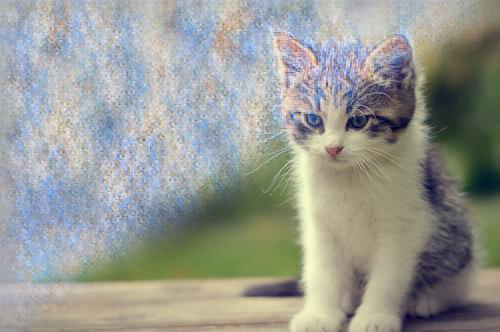

In [6]:
thumbnail